In [28]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.special as ss
%precision 20
%matplotlib inline

In [29]:
def GD(svec, tvec):
    rvec = tvec - svec
    rnorm = np.sqrt(rvec.dot(rvec))
    return np.identity(3) / rnorm**3 - 3* np.outer(rvec,rvec) / rnorm ** 5

def PD(svec,tvec):
    rvec = tvec - svec
    rnorm = np.sqrt(rvec.dot(rvec))
    return rvec/rnorm**3

In [30]:
PD(np.array([1,1,1]),np.array([0,0,0]))

array([-0.19245008972987528995, -0.19245008972987528995,
       -0.19245008972987528995])

In [57]:
def pair(svec,tvec):
    dipole=np.array([np.pi,np.e,np.sin(1)])
    potential=0
    size=50
    for i in range(-size,size+1):
        for j in range(-size,size+1):
            for k in range(-size,size+1):
                potential=potential+PD(svec,tvec+np.array([i,j,k])).dot(dipole)
    print(potential)

In [58]:
pair(np.array([0.5,0.6,0.7]),np.array([0,0,0]))

-13.8506696704


In [33]:
pair(np.array([0.7,0.8,0.9]),np.array([0.2,0.2,0.2]))

-12.6692701143


In [34]:
def f(r,eta):
    return ss.erfc(np.sqrt(np.pi/eta)*r)/r

def fp(r,eta):
    return -ss.erfc(np.sqrt(np.pi/eta)*r)/(r*r) - 2*np.exp(-np.pi*r*r/eta)/(r*np.sqrt(eta))

def fpp(r,eta):
    return 2*ss.erfc(np.sqrt(np.pi/eta)*r)/(r*r*r) +4*np.pi*np.power(1/eta,1.5)*np.exp(-np.pi*r*r/eta)+4*np.exp(-np.pi*r*r/eta)/(r*r*np.sqrt(eta))

In [35]:
r=5
eta=0.5
print(f(r,eta),fp(r,eta),fpp(r,eta))

5.42257863137e-71 -3.42872898419e-69 2.16123466024e-67


In [74]:
# note this is for box length = 1

def KEwald(rm,rn,eta):
    # relocate rm, rn to periodic box
    rm[0]=rm[0]-np.floor(rm[0])
    rm[1]=rm[1]-np.floor(rm[1])
    rm[2]=rm[2]-np.floor(rm[2])
    rn[0]=rn[0]-np.floor(rn[0])
    rn[1]=rn[1]-np.floor(rn[1])
    rn[2]=rn[2]-np.floor(rn[2])
    
    pLim=4
    Kreal=0
    for i in range(-pLim,pLim+1):
        for j in range(-pLim,pLim+1):
            for k in range(-pLim,pLim+1):
                rmn=rm-rn+np.array([i,j,k])
                r=np.sqrt(rmn.dot(rmn))
                if(r < 1e-20):
                    continue
                Kreal+= fp(r,eta)/r*rmn
    Kreal=-Kreal
    
    kLim=4
    Kwave=0
    rmn=rm-rn
    for i in range(-kLim,kLim+1):
        for k in range(-kLim,kLim+1):
            for j in range(-kLim,kLim+1):
                kvec=np.array([i,j,k])
                knorm=np.sqrt(kvec.dot(kvec))
                if knorm<1e-15:
                    continue   
                Kwave += 2*np.pi*np.sin(2*np.pi*kvec.dot(rmn)) \
                *np.exp(-eta*np.pi*knorm*knorm)/(np.pi*knorm*knorm)*kvec
    Kself=0
    
    #print(Kreal,Kwave,Kself)
    
    return Kwave+Kreal+Kself

In [75]:
%precision 20

GDP=KEwald(np.array([0.4,0.6,0.7]),np.array([0,0,0]),0.5)
print(GDP)
print(GDP.dot(np.array([np.pi,np.e,np.sin(1)])))

[ 0.59611363776427639394 -0.59611363776427628292 -0.78738671028636630922]
-0.410221714656


In [76]:
GDP=KEwald(np.array([0.4,0.6,0.7]),np.array([0,0,0]),0.125)
print(GDP)
print(GDP.dot(np.array([np.pi,np.e,np.sin(1)])))

[ 0.59611315630248440378 -0.59611315630248373765 -0.78738577510441964957]
-0.410221131535


In [77]:
GDP=KEwald(np.array([0.6,0.8,0.9]),np.array([0.2,0.2,0.2]),1.2)
print(GDP)
print(GDP.dot(np.array([np.pi,np.e,np.sin(1)])))

[ 0.596113637764276727   -0.59611363776427661598 -0.78738671028636686433]
-0.410221714656


In [78]:
r=4
eta=1.0
print(f(r,eta),fp(r,eta),fpp(r,eta))
print(-4*np.pi*np.pi*np.exp(-eta*np.pi*r*r)/(np.pi*r*r)*r*r)

2.91400959945e-24 -7.4680233198e-23 1.89594983016e-21
-1.85860971356e-21


In [79]:
etalist=np.array([0.1*i for i in range(4,20)])
diff=np.array([0.596113637764276727-KEwald(np.array([0.6,0.8,0.9]),np.array([0.2,0.2,0.2]),etalist[i])[0] for i in range(20-4)])


array([  5.55111512312578270212e-16,   1.11022302462515654042e-16,
         2.22044604925031308085e-16,   1.11022302462515654042e-16,
         1.11022302462515654042e-16,   2.22044604925031308085e-16,
        -1.11022302462515654042e-16,   3.33066907387546962127e-16,
         0.00000000000000000000e+00,   1.11022302462515654042e-16,
         9.99200722162640886381e-16,  -5.55111512312578270212e-16,
        -5.55111512312578270212e-16,  -7.77156117237609578297e-16,
        -8.88178419700125232339e-16,  -1.33226762955018784851e-15])

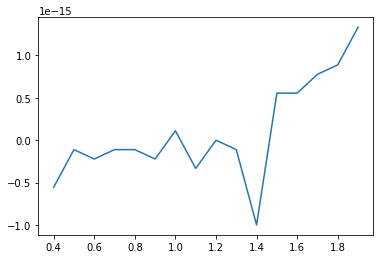

In [80]:
plt.plot(etalist,-diff)
diff

In [81]:
KEwald(np.array([0.5,0.5,0.5]),np.array([0.5,0.5,0.5]),1.0).dot(np.array([1,1,1]))

0.00000000000000000113

In [82]:
KEwald(np.array([0,0,0]),np.array([0.5,0.5,0.5]),1.0).dot(np.array([0.5,0.5,0.5]))

0.00000000000000000453

In [83]:
KEwald(np.array([0.2,0.3,0.4]),np.array([0.3,0.6,0.5]),1.0).dot(np.array([3,2,1]))

-23.48660380315382667504

In [84]:
KEwald(np.array([0.7,0.9,0.7]),np.array([0.2,0.3,0.4]),1.0).dot(np.array([0.1,2,0.3]))

-0.83918927151112920892